In [1]:
# Standard library imports
from argparse import ArgumentParser
import os, sys
THIS_DIR = os.path.abspath('')
PARENT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(PARENT_DIR)

# Third party imports
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint
from torch.utils.data import DataLoader
import torch
from torch.nn import functional as F
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

# local application imports
from ablations.PixelHNN import PixelHNNDataset
from ablations.baseline_pend_PixelHNN_trainer import Model

DPI = 600

In [2]:
checkpoint_path = os.path.join(PARENT_DIR, 
                               'logs', 
                               'baseline-pend-PixelHNN', 'lightning_logs',
                               'version_1', 
                               'checkpoints', 
                               'baseline-pend-PixelHNNepoch=974.ckpt')
model = Model.load_from_checkpoint(checkpoint_path)

In [3]:
data_path=os.path.join(PARENT_DIR, 'datasets', 'pendulum-gym-image-dataset-test.pkl')
test_dataset = PixelHNNDataset(data_path)

test_dataloader = DataLoader(test_dataset, 
                             batch_size=18, 
                             shuffle=False)

In [4]:
def show_imgs(x):
    fig = plt.figure()
    np_x = x[:, :1024].detach().cpu().numpy()
    np_x = np.reshape(np_x, (18, 32, 32), order='F')
    grid = utils.make_grid(torch.as_tensor(np_x).view(18, 1, 32, 32))
    plt.imshow(grid.permute(1,2,0).detach().cpu().numpy())

def plot_imgs(x, name):
    fig = plt.figure()
    np_x = x[:, :1024].detach().cpu().numpy()
    np_x = np.reshape(np_x, (18, 32, 32), order='F')
    fig = plt.figure(figsize=(16, 4), dpi=DPI)
    for i in range(9):
        plt.subplot(1, 9, i+1)
        plt.imshow(np_x[i*2], cmap='gray')
        plt.axis('off')
#     fig.savefig(os.path.join(PARENT_DIR, 'figures', f'PixelHNN_{name}.png'), bbox_inches='tight')

def plot_latent(x, suffix):
    z = model.pixelHNN.encode(x)
    z = z.detach().cpu().numpy()
    fig = plt.figure(figsize=(4, 4), dpi=DPI)
    plt.plot(z[:,0], z[:,1], '*', markersize=2)
    plt.xlabel("$z_0$ (analogous to $\\phi$)")
    plt.ylabel("$z_1 \\approx \dot z_0$ (analogous to $\dot \\phi$)")
    plt.title("Latent representation of data ($z$)")

    plt.tight_layout() ; plt.show()
#     fig.savefig(os.path.join(PARENT_DIR, 'figures', f'PixelHNN_latent_hnn_{suffix}.png'), bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


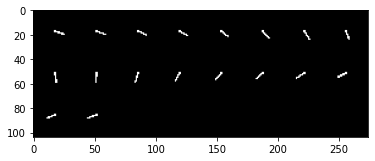

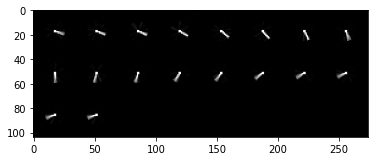

In [5]:
test_dataloader_iter = iter(test_dataloader)
for i in range(1):
    test_batch = next(test_dataloader_iter)
res = model.training_step(test_batch, 0)
show_imgs(test_batch[0])
show_imgs(model.x_hat)

## Plot one trajectory (true, prediction and latent space)

<Figure size 432x288 with 0 Axes>

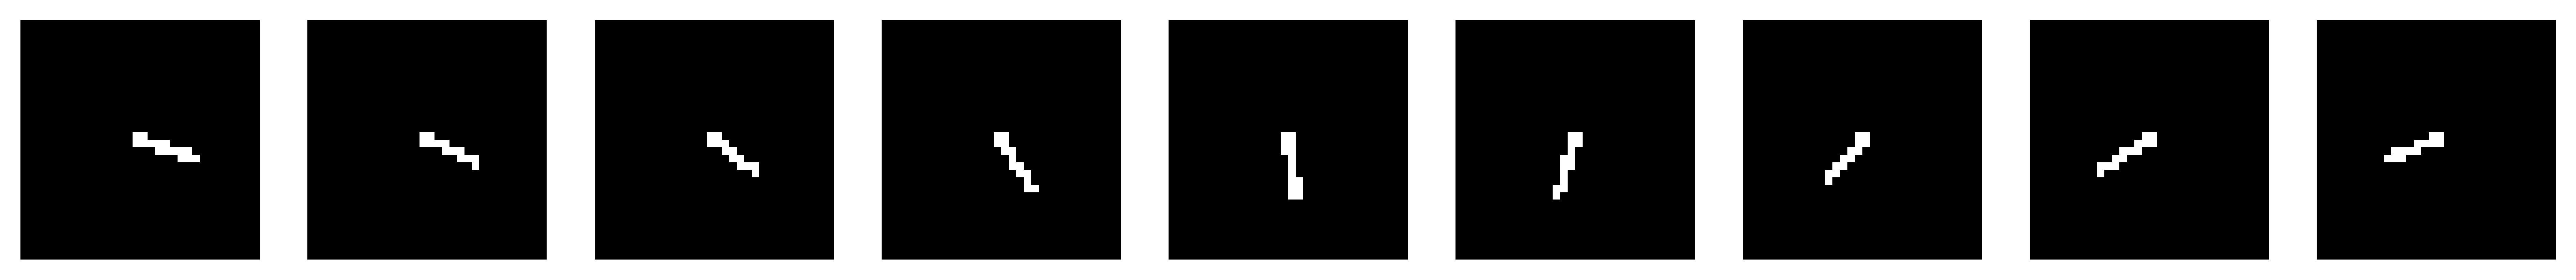

In [6]:
plot_imgs(test_batch[0], 'true_0')

<Figure size 432x288 with 0 Axes>

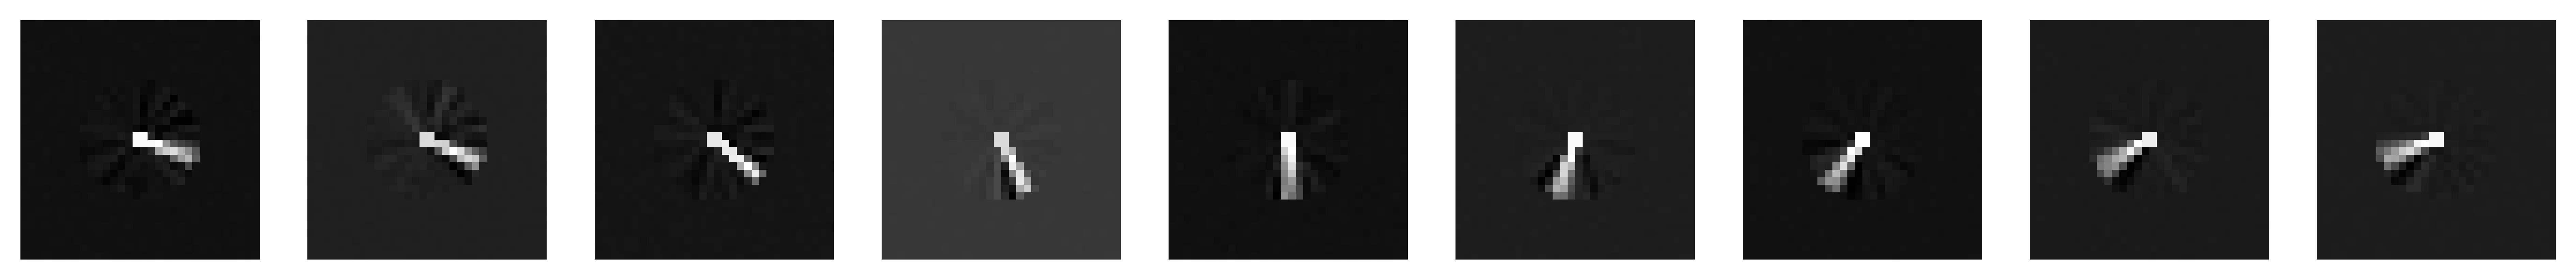

In [7]:
plot_imgs(model.x_hat, 'pred_0')

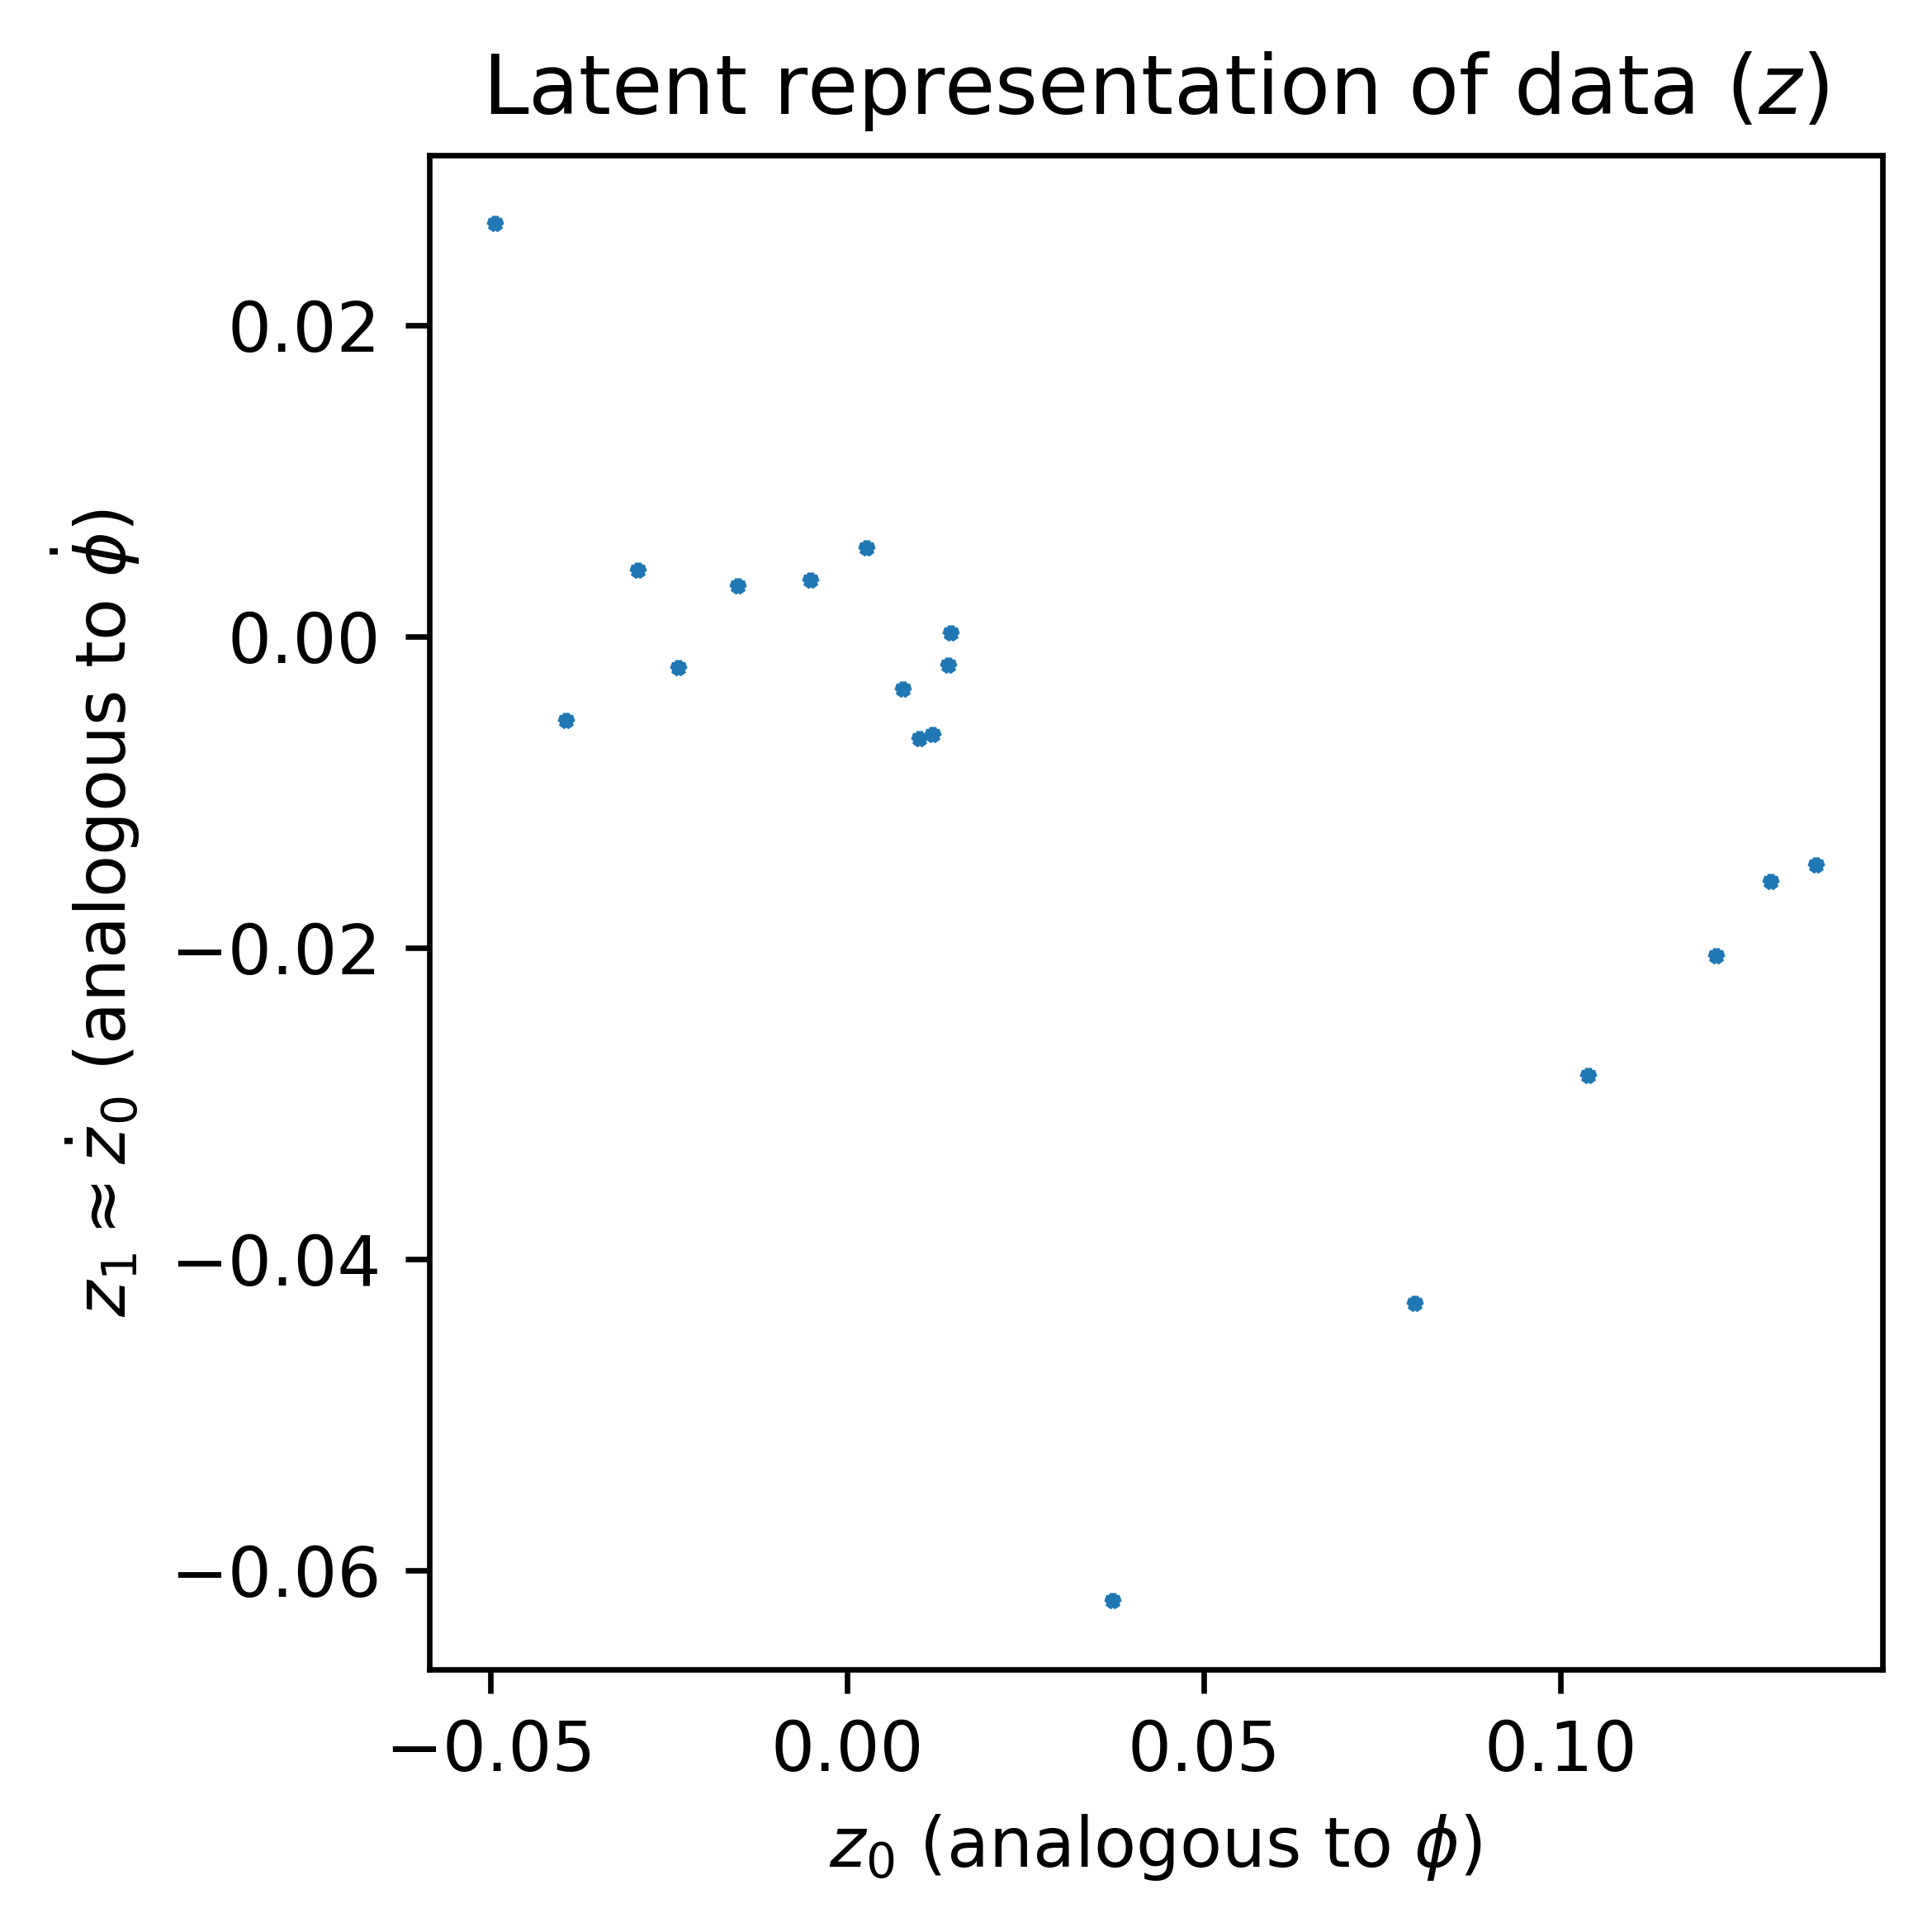

In [8]:
plot_latent(test_batch[0], '0')

## Plot another trajectory (true, prediction and latent space)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


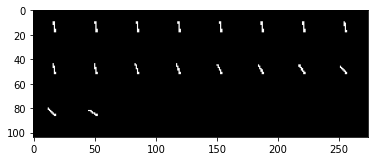

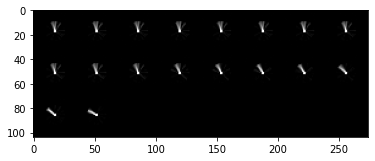

In [9]:
test_dataloader_iter = iter(test_dataloader)
for i in range(8):
    test_batch = next(test_dataloader_iter)

res = model.training_step(test_batch, 0)
show_imgs(test_batch[0])
show_imgs(model.x_hat)

<Figure size 432x288 with 0 Axes>

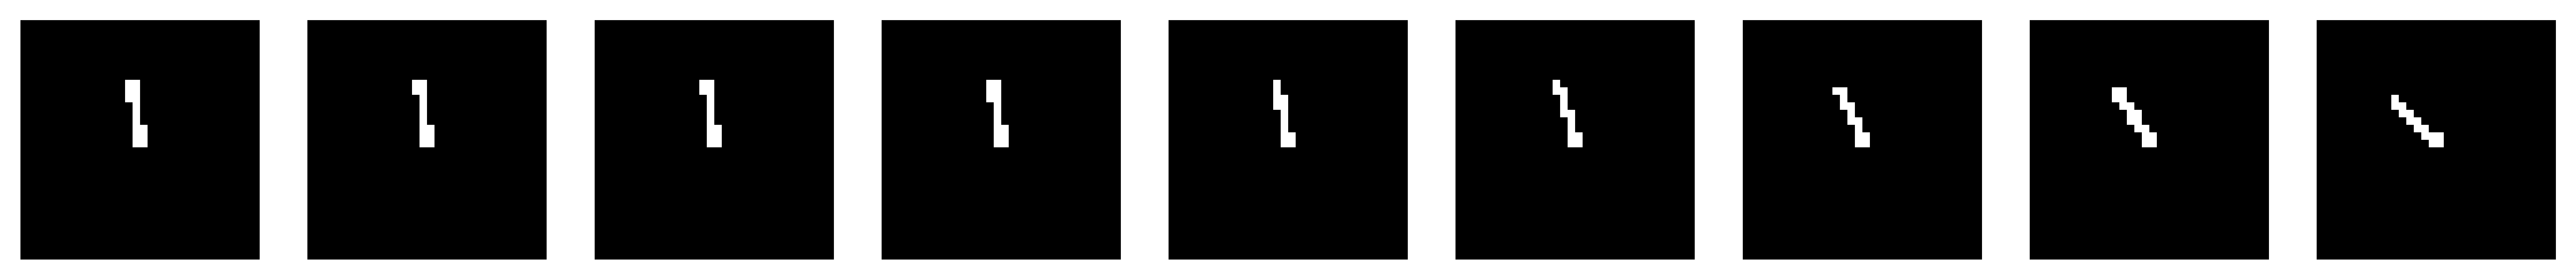

In [10]:
plot_imgs(test_batch[0], 'true_1')

<Figure size 432x288 with 0 Axes>

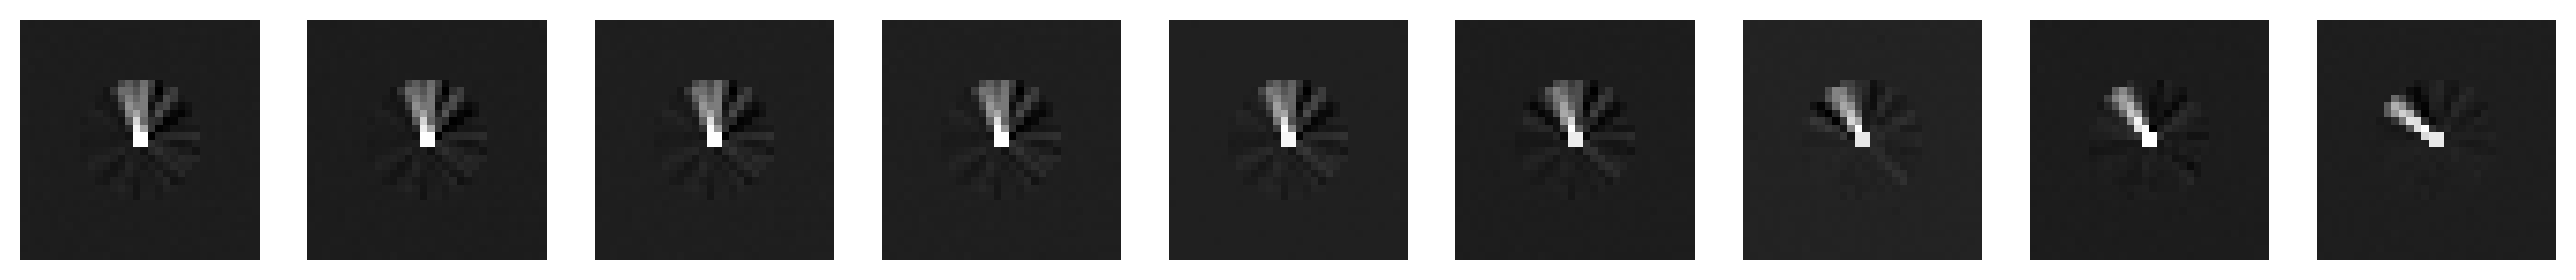

In [11]:
plot_imgs(model.x_hat, 'pred_1')

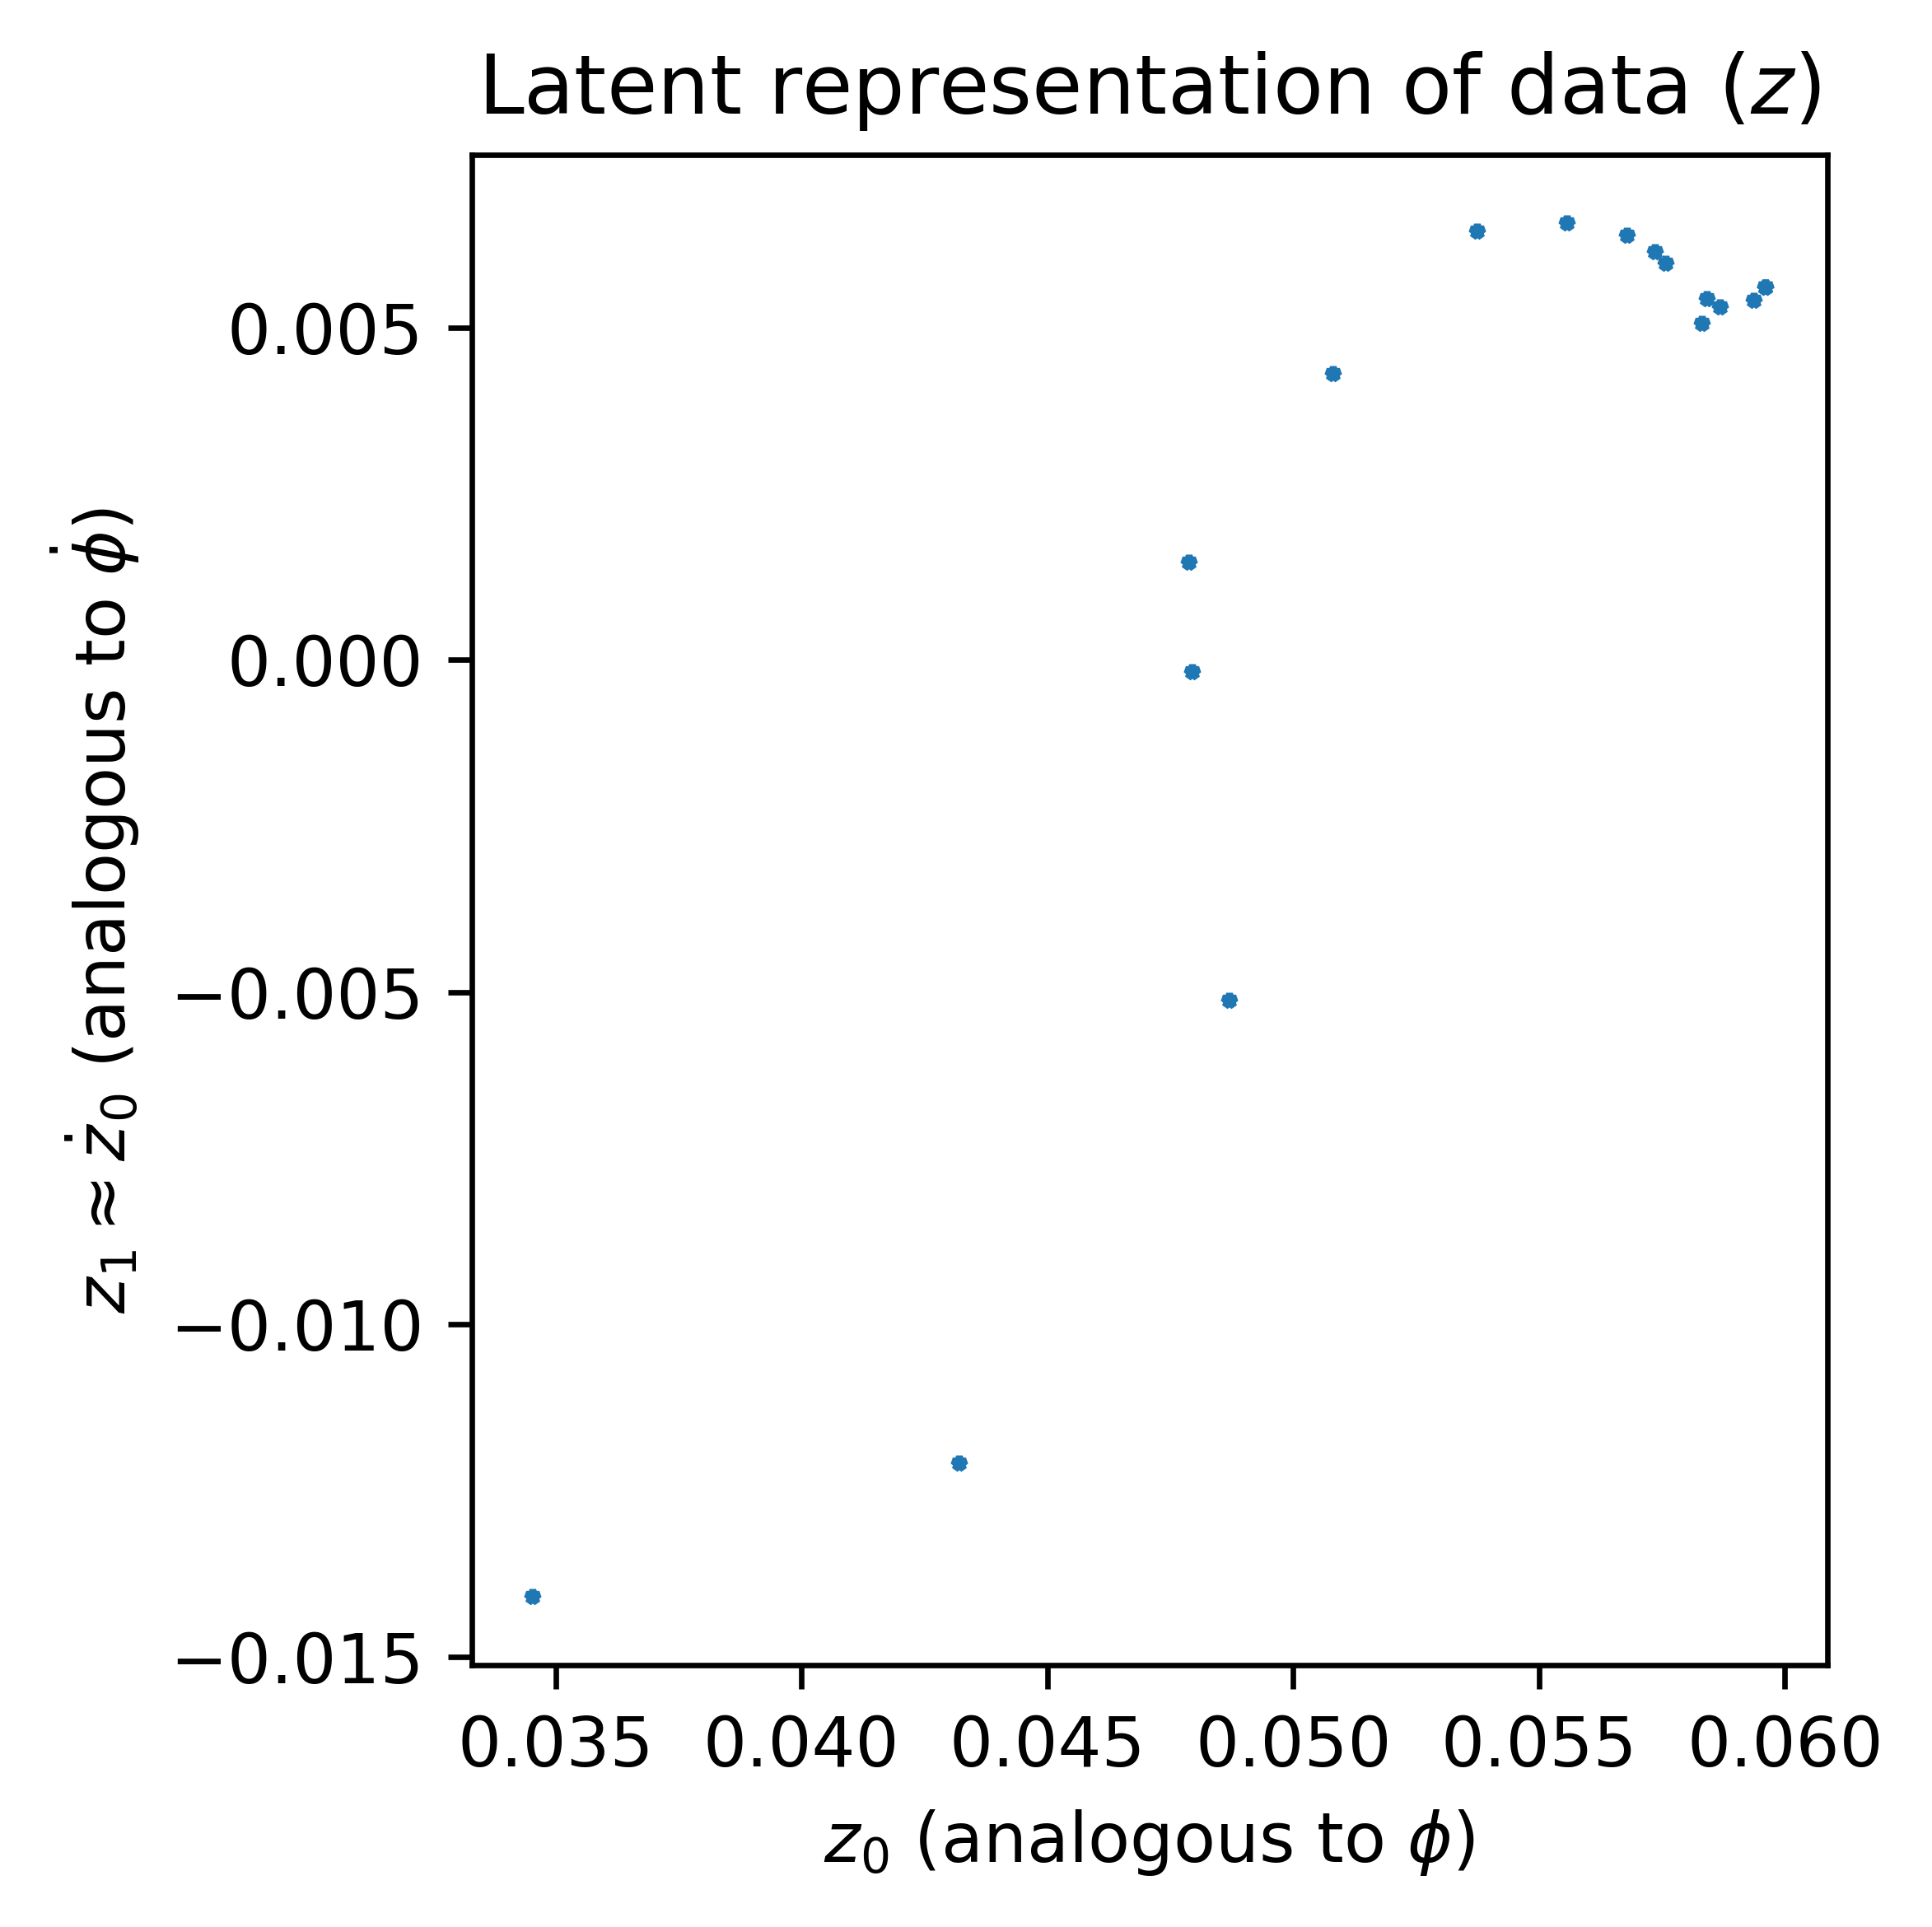

In [12]:
plot_latent(test_batch[0], '1')